In [2]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [15]:
def ec_mov(x_p,t,epsilon=1.):
    # x_p = x,y,px,py
    r32 = (x_p[0]**2 + x_p[1]**2)**(1.5)
    dx = x_p[2]
    dy = x_p[3]*epsilon
    dpx = -x_p[0]/r32
    dpy = -x_p[1]/r32
    return array([dx,dy,dpx,dpy])

def energia(x_p,epsilon=1.):
    r = (x_p[0]**2 + x_p[1]**2)**(0.5)
    E = 0.5*(x_p[2]**2 + epsilon*x_p[3]**2) - 1./r
    return E

def cond_ini(alfa,var=0.001):
    angulo = alfa + var*(2*rand() - 1)
    x = cos(angulo)
    y = sin(angulo)
    return array([x,y,0.25,0])

In [4]:
def p_rho(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3],
    r = (x**2 + y**2)**(0.5)
    p_r = (x*px + y*py)/r
    return p_r,r

E= -0.5 E_f=  -0.500000000683
E= -0.5 E_f=  -0.500000002294
E= -0.5 E_f=  -0.500000001413
E= -0.5 E_f=  -0.500000001926
E= -0.5 E_f=  -0.499999992501
E= -0.5 E_f=  -0.500000005933
E= -0.5 E_f=  -0.499999994667
E= -0.5 E_f=  -0.499999998615
E= -0.5 E_f=  -0.500000000859
E= -0.5 E_f=  -0.499999997438


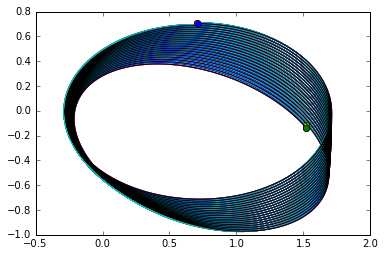

In [5]:
t = arange(0,120,0.0001)
eps = 1.02
for i in range(10):
    pto_ini = cond_ini(pi/4,0.01)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    plot(sol[:,0],sol[:,1])
    plot(pto_ini[0],pto_ini[1],'o')
    plot(sol[-1,0],sol[-1,1],'o')
    print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps,)

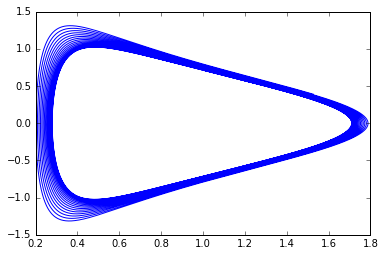

In [130]:
pr,r = p_rho(sol)
plot(r,pr)
show()

E= -0.5 E_f=  -0.500000000939
E= -0.5 E_f=  -0.500000023884
E= -0.5 E_f=  -0.500000028033
E= -0.5 E_f=  -0.500000012473
E= -0.5 E_f=  -0.500000024403
E= -0.5 E_f=  -0.500000026762
E= -0.5 E_f=  -0.500000012716
E= -0.5 E_f=  -0.500000005523
E= -0.5 E_f=  -0.50000002867
E= -0.5 E_f=  -0.50000002304


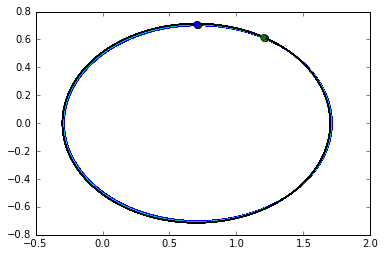

In [6]:
t = arange(0,120,0.0001)
eps = 1
for i in range(10):
    pto_ini = cond_ini(pi/4,0.01)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    plot(sol[:,0],sol[:,1])
    plot(pto_ini[0],pto_ini[1],'o')
    plot(sol[-1,0],sol[-1,1],'o')
    print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps,)

In [6]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0]) > error :
        tip1 = ti - (pto_i[0]/pto_i[2])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

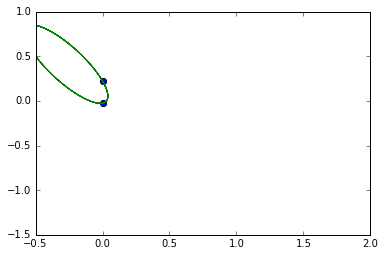

In [22]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ec_mov,sol[i],t[i])
        j+=1
        
raices,puntos = raices[0:j],puntos[0:j]
xlim(-0.5,2)
ylim(-1.5,1)
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])

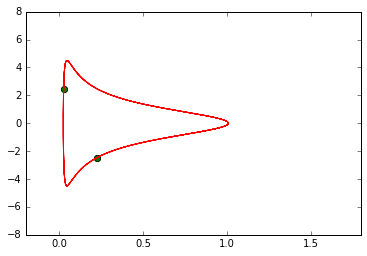

In [23]:
pr,r = p_rho(puntos)
xlim(-0.2,1.8),ylim(-8,8)
plot(r[0],pr[0],'o')
plot(r,pr,'o')
pr,r = p_rho(sol)
plot(r,pr)
show()

# $\epsilon = 1$

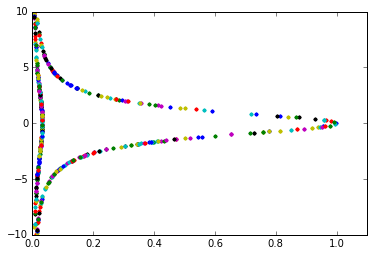

In [27]:
t = arange(0,10,0.0001)
N_trayectorias,eps = 300,1.

for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    #print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps)
    num = len(t)
    raices,puntos = zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim(-0.,1.1)
    ylim(-10,10)
    plot(r,pr,'.')
show()

In [ ]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ec_mov,sol[i],t[i])
        j+=1
        
raices,puntos = raices[0:j],puntos[0:j]
xlim(-0.5,2)
ylim(-1.5,1)
plot(puntos[:,0],puntos[:,1],'o')
plot(sol[:,0],sol[:,1])

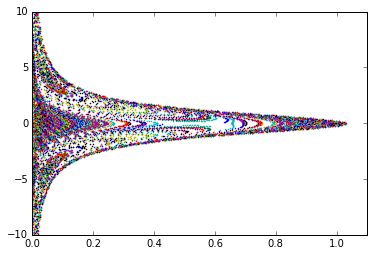

In [38]:
t = arange(0,100,0.0001)
N_trayectorias,eps = 200,1.1

for i in range(N_trayectorias):
    pto_ini = cond_ini(pi/4,pi)
    sol = odeint(ec_mov,pto_ini,t,args=(eps,),atol=1e-12,rtol=1e-10)
    #print "E=", energia(pto_ini,eps), "E_f= ", energia(sol[-1],eps)
    num = len(t)
    raices,puntos = zeros(num),zeros((num,4))
    j=0
    for k in range(len(t)-1):
        if (sol[k][0]*sol[k+1][0]) < 0:
            raices[j],puntos[j] = root_trayec(ec_mov,sol[k],t[k])
            j+=1
    raices,puntos = raices[0:j],puntos[0:j]
    pr,r = p_rho(puntos)
    xlim(-0.,1.1)
    ylim(-10,10)
    plot(r,pr,'.',markersize=2)
show()